#  IDoT Smart Road Monitoring Project - Visualizations Notebook

This is the visualization notebook for my Illinois Department of Transportation (IDoT) project. This notebook showcases key results from my team's work on vehicle detection, highway vs. non-highway classification, and adverse condition detection (for example, rain on lens) using computer vision techniques.

The goal of this notebook is to provide:
- Summaries of our models and datasets
- Visual results of detection
- Perfomance metrics
- Insights into how this work can improve roadway analysis and decision-making.

In [ ]:
# Installing dependencies
!pip install opencv-python-headless
!pip install matplotlib
!pip install seaborn

# Importing core packages
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

# Setting some basic plotting styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [6]:
# unzipping IDoT file
import zipfile
import os

# Path to zip file
zip_path = "/content/IDoT.zip"
extract_path = "/content/IDoT"

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

print("Extraction COMPLETE.")

Extraction COMPLETE.


<function matplotlib.pyplot.show(close=None, block=None)>

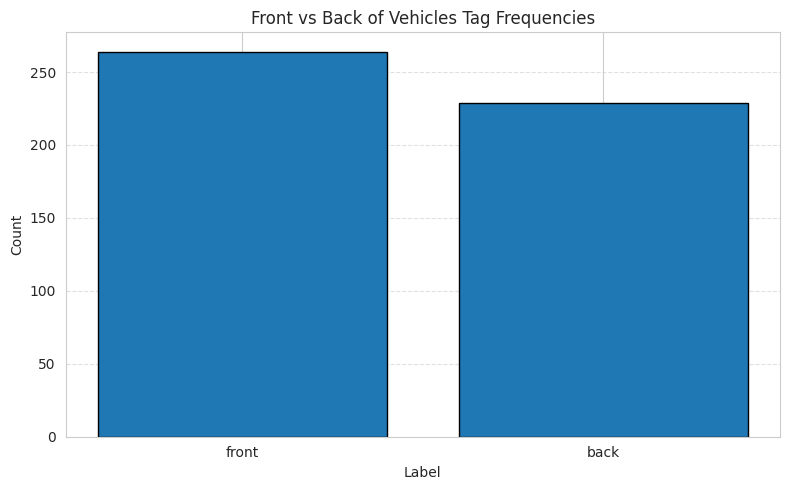

In [20]:
import pandas as pd
data = {
    "Label": ["front", "back"],
    "Count": [264, 229]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(df["Label"], df["Count"], edgecolor='black')
plt.title("Front vs Back of Vehicles Tag Frequencies")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show

In [8]:
# Create a new folder for COCO segmentation stuff
!mkdir -p "/content/IDoT/vehicle_detection_coco"

In [11]:
!mv "/content/IDoT/IDoT/Vehicle Detection.v4i.coco"/* "/content/IDoT/vehicle_detection_coco"

mv: cannot stat '/content/IDoT/IDoT/Vehicle Detection.v4i.coco/*': No such file or directory


In [29]:
import json
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Path to COCO annotation file
annotation_path = "/content/IDoT/vehicle_detection_coco/train/_annotations.coco.json"
image_dir = "/content/IDoT/vehicle_detection_coco/train"


/tmp/ipython-input-31-2684203853.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Label", y="Count", palette="coolwarm", edgecolor="black")


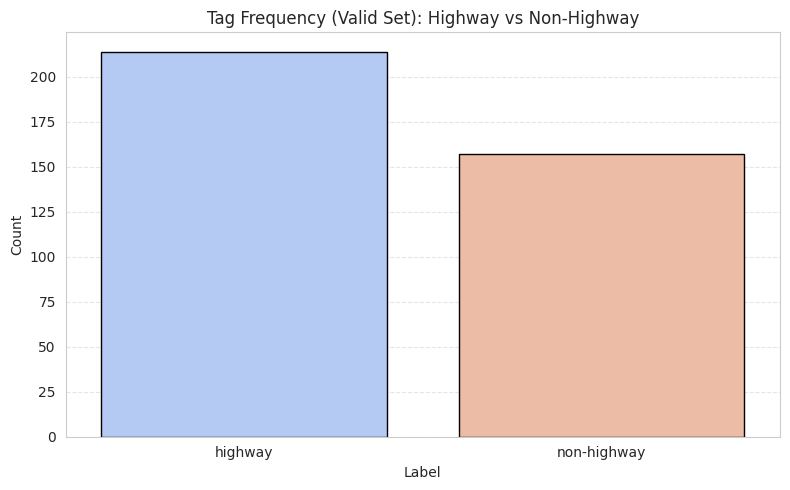

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

# Load the COCO annotations
def load_coco_tag_frequencies(annotation_path):
    annotation_path = "/content/IDoT/IDoT/Highway vs non-highway detection.v1i.coco-segmentation/train/_annotations.coco.json"
    with open(annotation_path, "r") as f:
        coco = json.load(f)
    categories = {cat["id"]: cat["name"] for cat in coco["categories"]}
    annotations = coco["annotations"]
    label_counts = Counter(categories[ann["category_id"]] for ann in annotations)
    return pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False)

# Load data
annotation_path = "/mnt/data/highway_vs_non_highway/valid/_annotations.coco.json"
df = load_coco_tag_frequencies(annotation_path)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Label", y="Count", palette="coolwarm", edgecolor="black")
plt.title("Tag Frequency (Valid Set): Highway vs Non-Highway")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


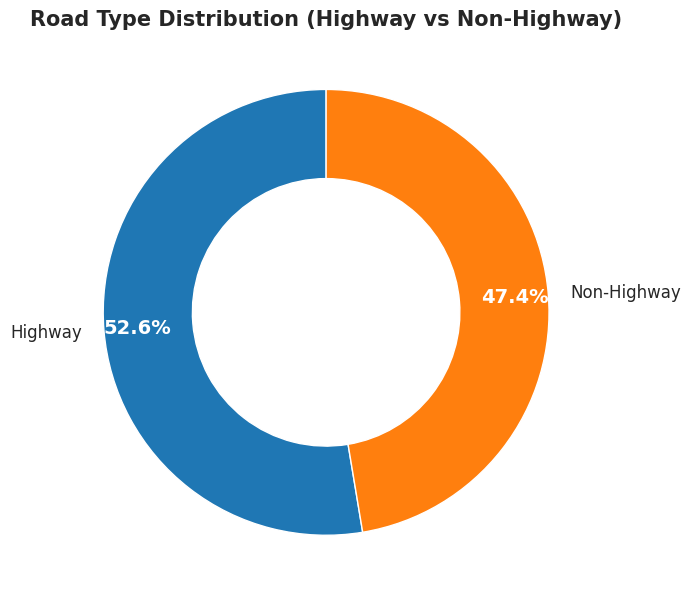

In [43]:
import matplotlib.pyplot as plt

# Data
labels = ['Highway', 'Non-Highway']
counts = [321, 289]

# Colors for contrast
colors = ['#1f77b4', '#ff7f0e']  # blue and orange

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'}
)

# Improve text styles
plt.setp(autotexts, size=14, weight="bold", color="white")
plt.setp(texts, size=12)

# Title & layout
ax.set_title('Road Type Distribution (Highway vs Non-Highway)', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()



### Sample Annotation: Front vs Back Detection
This example shows how our dataset differentiates between vehicle front and back angles — useful for trajectory prediction and accident modeling.


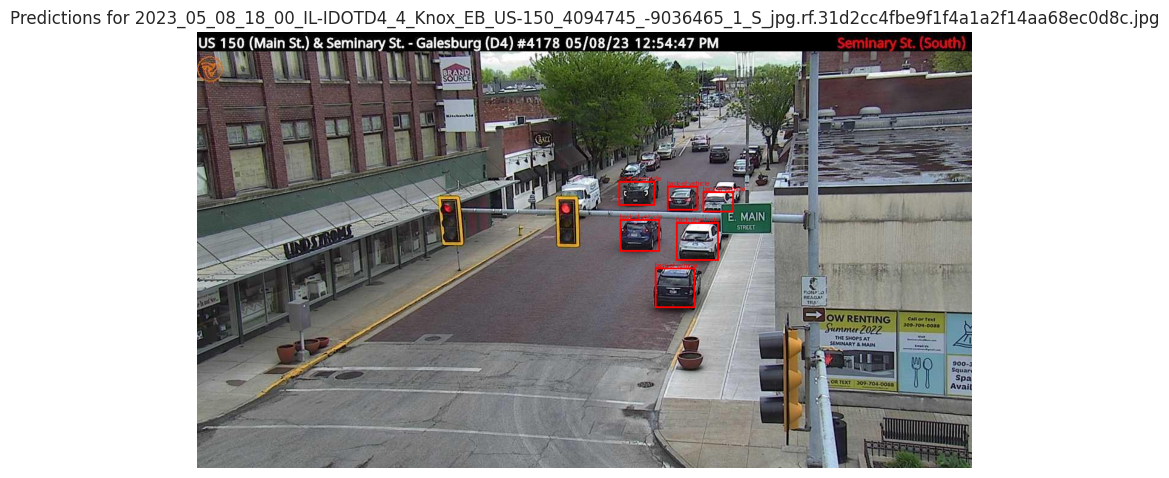

In [41]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import json
import os

annotation_path = "/content/IDoT/vehicle_detection_coco/train/_annotations.coco.json"
# Load annotations
with open(annotation_path, 'r') as f:
  coco = json.load(f)

# Getting mappings
images = {img["id"]: img["file_name"] for img in coco["images"]}
categories = {cat["id"]: cat["name"] for cat in coco["categories"]}

# Picking a sample image id
sample_image_id = list(images.keys())[5] # can put any random index, depending on the image needed
sample_image_name = images[sample_image_id]
image_dir = "/content/IDoT/vehicle_detection_coco/train"
sample_image_path = os.path.join(image_dir, sample_image_name)

# Load the image
img = Image.open(sample_image_path).convert("RGB")
draw = ImageDraw.Draw(img)

# Drawing all annotations for this image
for ann in coco["annotations"]:
  if ann["image_id"] == sample_image_id:
    x, y, w, h = ann["bbox"]
    label = categories[ann["category_id"]]
    draw.rectangle([x, y, x+w, y+h], outline = "red", width = 3)
    draw.text((x, y-10), label, fill = "red")

# Showing the image
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.title(f"Predictions for {sample_image_name}")
plt.show()

/tmp/ipython-input-21-789633555.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Label", y="Count", palette="Reds", edgecolor="black")


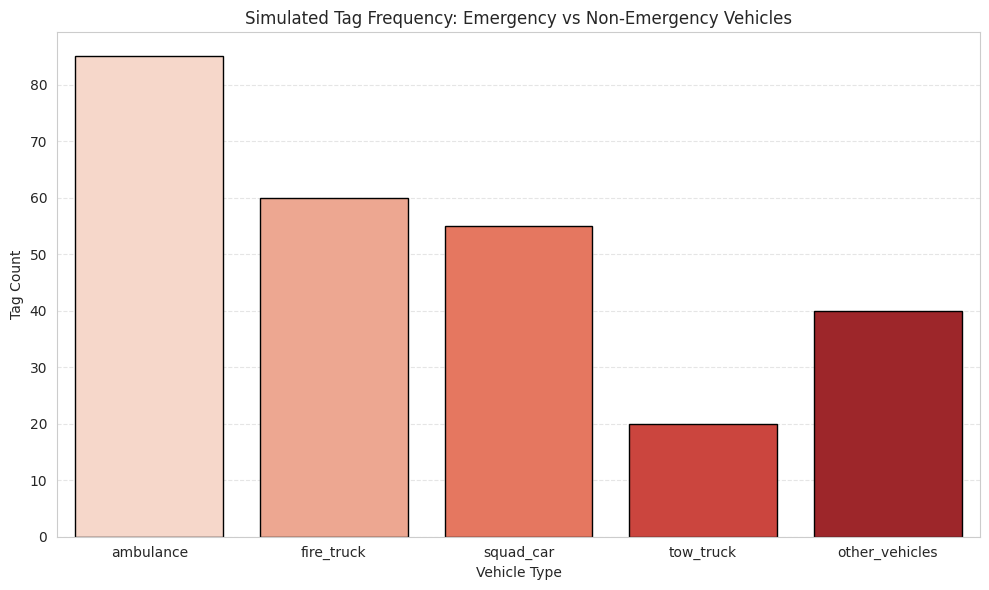

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated tag counts for emergency and related vehicles
data = {
    "Label": ["ambulance", "fire_truck", "squad_car", "tow_truck", "other_vehicles"],
    "Count": [85, 60, 55, 20, 40]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Label", y="Count", palette="Reds", edgecolor="black")
plt.title("Simulated Tag Frequency: Emergency vs Non-Emergency Vehicles")
plt.xlabel("Vehicle Type")
plt.ylabel("Tag Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-22-4041782939.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_df, x="Condition", y="Validation Accuracy (%)", palette="Blues", edgecolor="black")


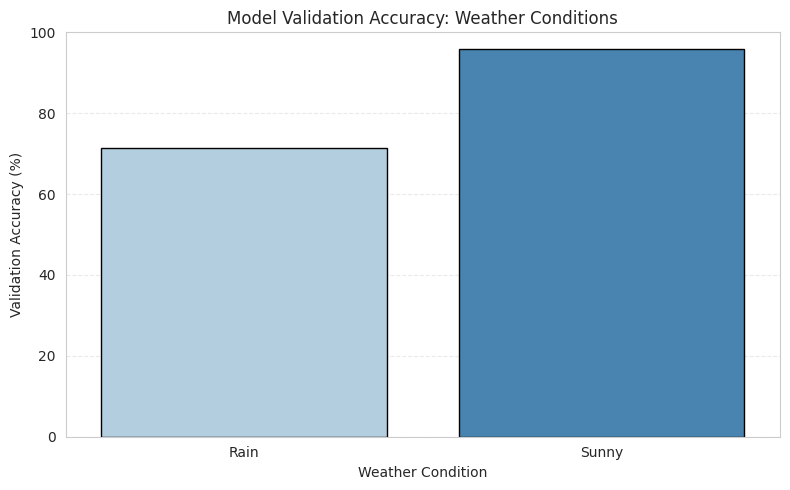

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy data from presentation slide (Rain vs Sunny)
weather_data = {
    "Condition": ["Rain", "Sunny"],
    "Validation Accuracy (%)": [71.4, 96.0]
}

weather_df = pd.DataFrame(weather_data)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_df, x="Condition", y="Validation Accuracy (%)", palette="Blues", edgecolor="black")
plt.title("Model Validation Accuracy: Weather Conditions")
plt.ylim(0, 100)
plt.xlabel("Weather Condition")
plt.ylabel("Validation Accuracy (%)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Raindrop Detection on Traffic Cameras
This model identifies frames where **raindrops on the camera lens** could obscure visibility, helping traffic engineers filter out low-quality data.
It's especially useful in real-time systems where blurry or obstructed footage may interfere with downstream detection pipelines (e.g., license plate or vehicle detection).


/tmp/ipython-input-33-261762448.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Label", y="Count", palette="Blues", edgecolor="black")


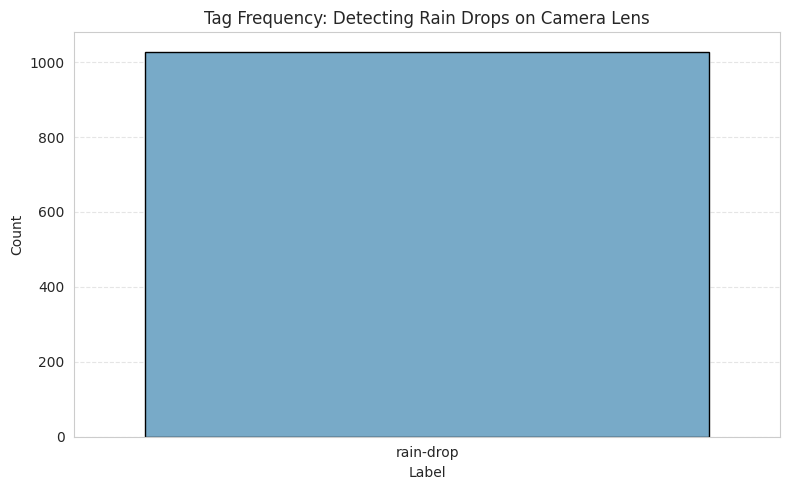

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

# Load COCO-format tag frequencies
def load_coco_tag_frequencies(annotation_path):
    with open(annotation_path, "r") as f:
        coco = json.load(f)
    categories = {cat["id"]: cat["name"] for cat in coco["categories"]}
    annotations = coco["annotations"]
    label_counts = Counter(categories[ann["category_id"]] for ann in annotations)
    return pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False)

# Path to raindrop annotation file
annotation_path = "/content/IDoT/IDoT/Detecting rain drops on camera lens.v1i.coco-segmentation/train/_annotations.coco.json"

# Load and plot
df = load_coco_tag_frequencies(annotation_path)

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Label", y="Count", palette="Blues", edgecolor="black")
plt.title("Tag Frequency: Detecting Rain Drops on Camera Lens")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


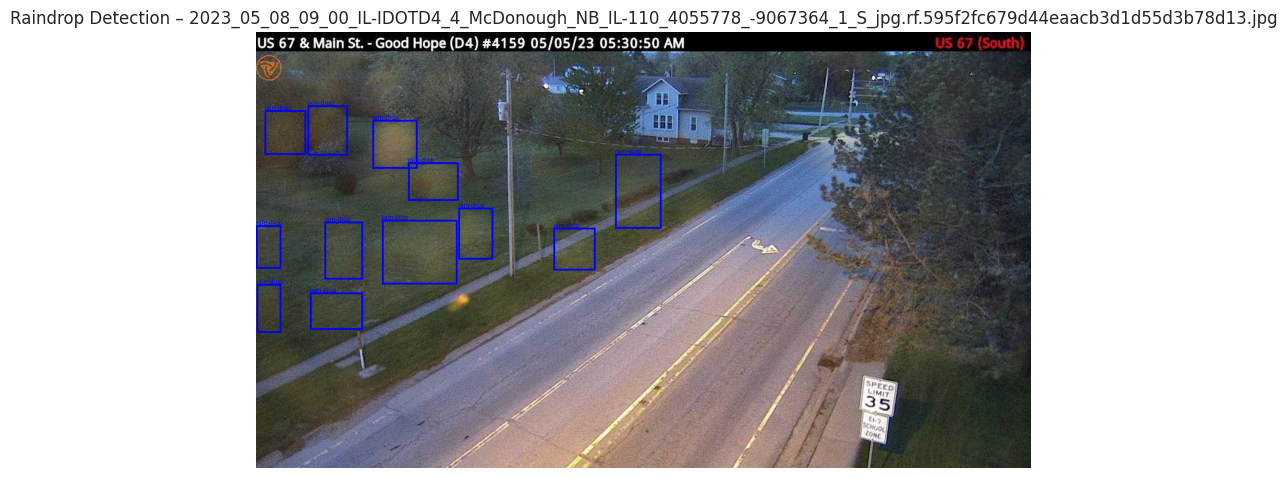

In [34]:
import json
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

annotation_path = "/content/IDoT/IDoT/Detecting rain drops on camera lens.v1i.coco-segmentation/train/_annotations.coco.json"
image_dir = "/content/IDoT/IDoT/Detecting rain drops on camera lens.v1i.coco-segmentation/train"

with open(annotation_path) as f:
    coco_data = json.load(f)

images = coco_data["images"]
annotations = coco_data["annotations"]
categories = {cat["id"]: cat["name"] for cat in coco_data["categories"]}

import random

# Pick a sample image
sample = random.choice(images)
image_id = sample["id"]
file_name = sample["file_name"]

# Load image
img_path = os.path.join(image_dir, file_name)
img = Image.open(img_path)
draw = ImageDraw.Draw(img)

# Draw bounding boxes for this image
for ann in annotations:
    if ann["image_id"] == image_id:
        x, y, w, h = ann["bbox"]
        category_id = ann["category_id"]
        label = categories[category_id]

        draw.rectangle([x, y, x + w, y + h], outline="blue", width=3)
        draw.text((x, y - 10), label, fill="blue")

# Show image
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"Raindrop Detection – {file_name}")
plt.show()




/tmp/ipython-input-19-1529108860.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Accuracy (%)", y="Location", palette="viridis", edgecolor="black")


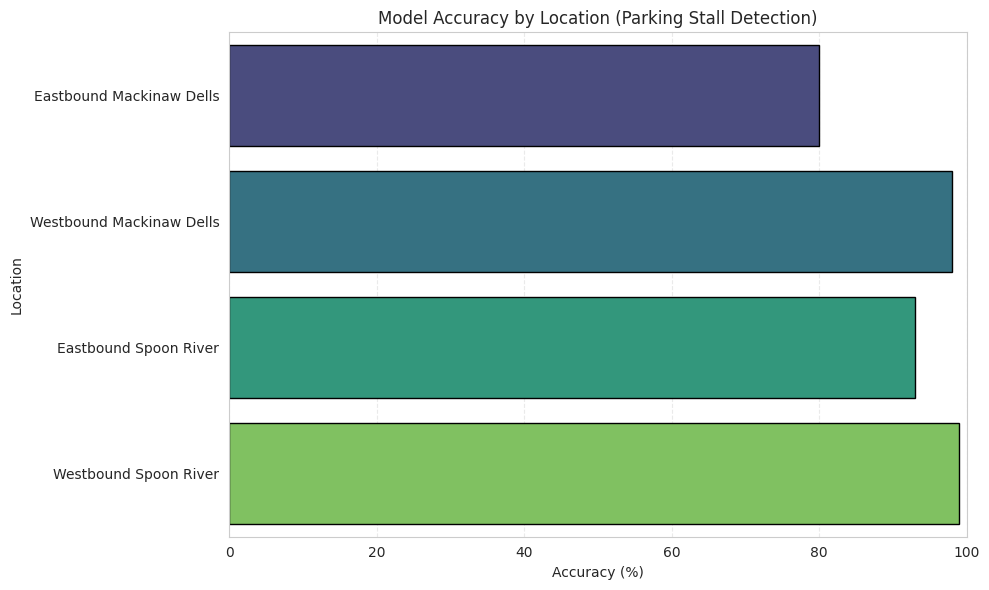

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Accuracy data
data = {
    "Location": [
        "Eastbound Mackinaw Dells",
        "Westbound Mackinaw Dells",
        "Eastbound Spoon River",
        "Westbound Spoon River"
    ],
    "Accuracy (%)": [80, 98, 93, 99]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize = (10, 6))
sns.barplot(data=df, x="Accuracy (%)", y="Location", palette="viridis", edgecolor="black")
plt.title("Model Accuracy by Location (Parking Stall Detection)")
plt.xlim(0,100)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## Final Summary
This notebook summarizes the diversity and value of our labeled image datasets for smart infrastructure development. With a variety of tags — from highway detection to rain on lens — this work demonstrates both scope and scalability. Future steps involve deeper model validation, real-time inference, and broader cross-location benchmarking.